In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1'

In [3]:
weight = 0.7
bias = 0.3
# create linear data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

Now we have our training set (X, Y)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]
print(f'number of training examples: {len(X_train)}')
print(f'number of test examples: {len(X_test)}')

number of training examples: 40
number of test examples: 10


In [5]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='predictions')
    plt.legend(prop={'size':10})

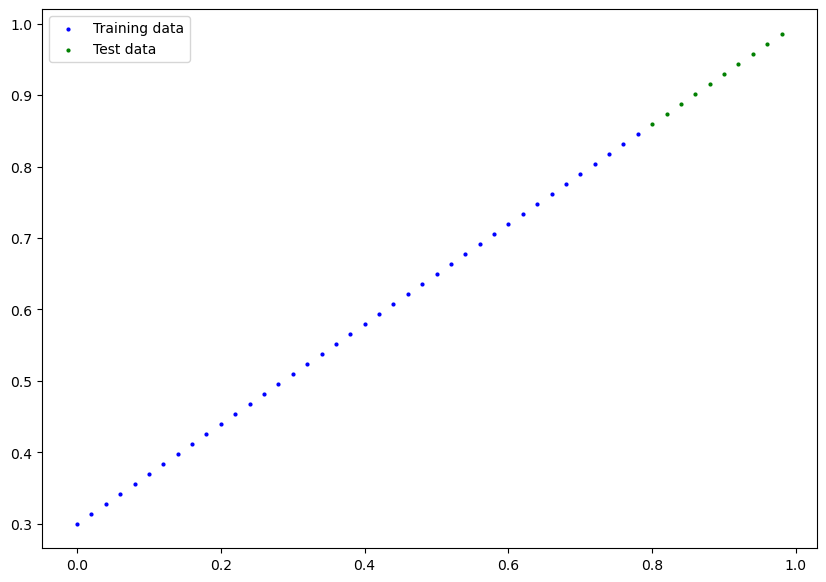

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1), requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([1.6208, 1.6385, 1.6561, 1.6738, 1.6914, 1.7090, 1.7267, 1.7443, 1.7620,
        1.7796])


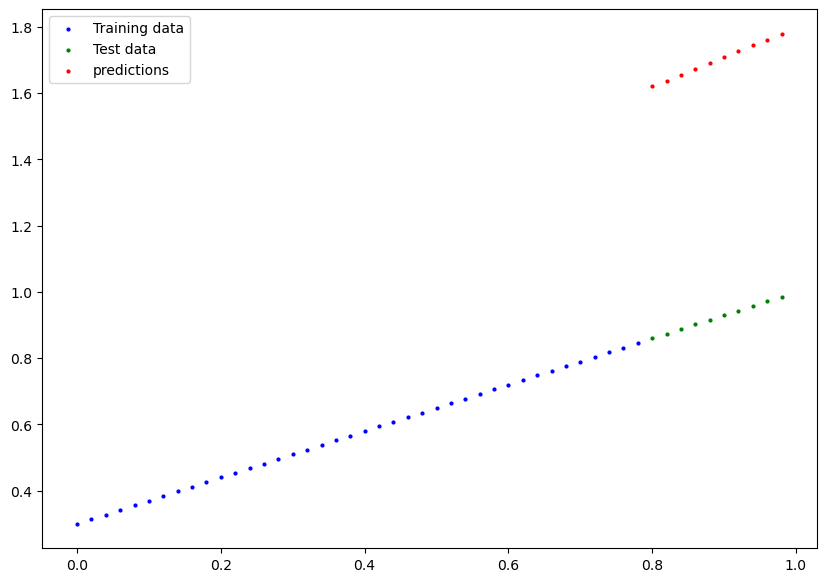

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([-0.7608, -0.7645, -0.7681, -0.7718, -0.7754, -0.7790, -0.7827, -0.7863,
        -0.7900, -0.7936])

In [14]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [15]:
torch.manual_seed(42)
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    
    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    # testing
    
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}')
            

Epoch: 0 | MAE train loss: 0.6860889196395874 | MAE test loss: 0.7637526988983154
Epoch: 10 | MAE train loss: 0.5708791017532349 | MAE test loss: 0.6290428042411804
Epoch: 20 | MAE train loss: 0.45566922426223755 | MAE test loss: 0.4943329691886902
Epoch: 30 | MAE train loss: 0.34045934677124023 | MAE test loss: 0.35962313413619995
Epoch: 40 | MAE train loss: 0.2252494841814041 | MAE test loss: 0.2249133139848709
Epoch: 50 | MAE train loss: 0.1100396141409874 | MAE test loss: 0.09020347893238068
Epoch: 60 | MAE train loss: 0.009724985808134079 | MAE test loss: 0.020998019725084305
Epoch: 70 | MAE train loss: 0.006216754671186209 | MAE test loss: 0.014099234715104103
Epoch: 80 | MAE train loss: 0.002788322512060404 | MAE test loss: 0.005826681852340698
Epoch: 90 | MAE train loss: 0.007095950655639172 | MAE test loss: 0.00754010071977973
Epoch: 100 | MAE train loss: 0.007095950655639172 | MAE test loss: 0.00754010071977973
Epoch: 110 | MAE train loss: 0.007095950655639172 | MAE test loss

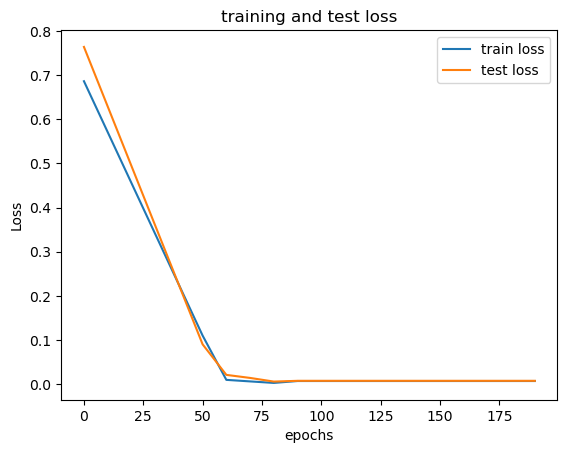

In [16]:
plt.plot(epoch_count, train_loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("training and test loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [20]:

model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([0.8661, 0.8801, 0.8940, 0.9080, 0.9220, 0.9359, 0.9499, 0.9638, 0.9778,
        0.9917])

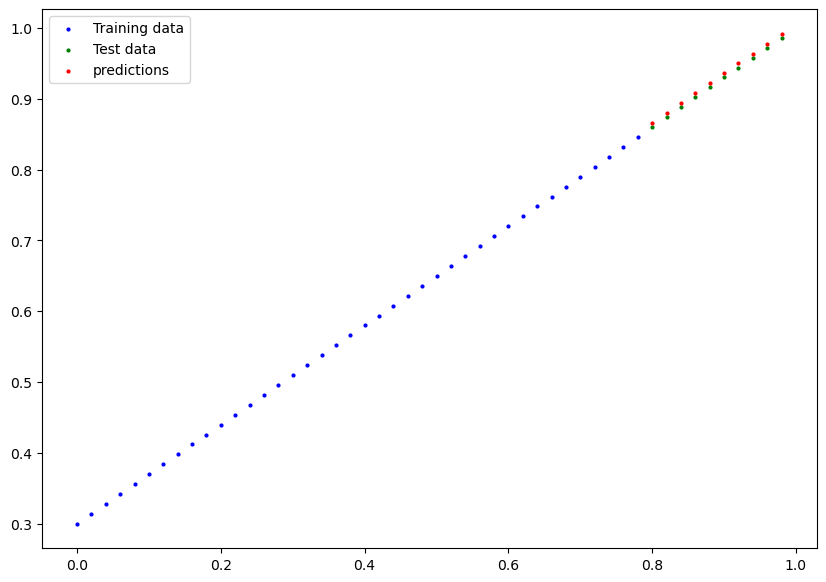

In [21]:
plot_predictions(predictions=y_preds)

In [22]:
# saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "simple_linear_regression"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/simple_linear_regression


In [24]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [26]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model_0(X_test)
y_preds == loaded_model_pred

tensor([True, True, True, True, True, True, True, True, True, True])